In [27]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

Import data ke project dan menampilkan 5 teratas

In [2]:
bmri = pd.read_csv('/content/BMRI.JK.csv')

bmri.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3687.5,3687.5,3687.5,3687.5,2840.737305,0
1,2019-01-02,3700.0,3700.0,3625.0,3662.5,2821.478027,45319200
2,2019-01-03,3637.5,3675.0,3550.0,3587.5,2763.700439,74174000
3,2019-01-04,3587.5,3725.0,3575.0,3725.0,2869.625977,78514000
4,2019-01-07,3750.0,3787.5,3712.5,3712.5,2859.996338,53624800


Menampilkan 5 terbawah


In [3]:
bmri.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1494,2025-02-11,4750.0,4950.0,4750.0,4880.0,4880.0,316743200
1495,2025-02-12,4920.0,4950.0,4830.0,4940.0,4940.0,225073300
1496,2025-02-13,4940.0,5075.0,4900.0,5025.0,5025.0,215271400
1497,2025-02-14,5100.0,5200.0,4970.0,5125.0,5125.0,239709300
1498,2025-02-17,5200.0,5475.0,5175.0,5425.0,5425.0,223837300


Menampilkan jumlah baris dan kolom

In [9]:
print('Jumlah baris = '+str(bmri.shape[0]))
print('Jumlah kolom = '+str(bmri.shape[1]))

Jumlah baris = 1485
Jumlah kolom = 7


Memeriksa tipe data dan nilai null

In [5]:
bmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1499 non-null   object 
 1   Open       1499 non-null   float64
 2   High       1499 non-null   float64
 3   Low        1499 non-null   float64
 4   Close      1499 non-null   float64
 5   Adj Close  1499 non-null   float64
 6   Volume     1499 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.1+ KB


Memeriksa nilai duplikat

In [6]:
print("Baris duplikat : " +str(bmri.duplicated().sum()))

Baris duplikat : 0


Pada dataset, terdapat beberapa baris yang bernilai 0 pada kolom volumenya. Saya akan menampilkan baris-baris yang bernilai 0 pada kolom volumenya.

In [7]:
bmri[bmri['Volume'] == 0]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3687.5,3687.5,3687.5,3687.5,2840.737305,0
25,2019-02-05,3675.0,3675.0,3675.0,3675.0,2831.107422,0
47,2019-03-07,3537.5,3537.5,3537.5,3537.5,2725.181885,0
66,2019-04-03,3712.5,3712.5,3712.5,3712.5,2859.996338,0
76,2019-04-17,3812.5,3812.5,3812.5,3812.5,2937.033447,0
78,2019-04-19,3900.0,3900.0,3900.0,3900.0,3004.440918,0
86,2019-05-01,3862.5,3862.5,3862.5,3862.5,2975.551758,0
107,2019-05-30,3775.0,3775.0,3775.0,3775.0,3002.193604,0
109,2019-06-03,3837.5,3837.5,3837.5,3837.5,3051.898682,0
110,2019-06-04,3837.5,3837.5,3837.5,3837.5,3051.898682,0


Setelah diperiksa, tanggal pada baris-baris tersebut bertepatan dengan hari libur di kalender Indonesia. Tidak ada aktivitas market pada hari libur. Saya memutuskan untuk menghapus baris-baris tersebut.

In [8]:
volumes_zero = bmri[bmri['Volume']== 0]

drop_volumes_zero = bmri.drop(volumes_zero.index, inplace = True)

bmri[bmri['Volume'] == 0]

,Date,Open,High,Low,Close,Adj Close,Volume


In [14]:
bmri.shape

(1485, 7)

Total baris sekarang menjadi 1485

Untuk mendapatkan statistik deskriptif dari setiap kolom numerik

In [13]:
bmri.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1.485000e+03
mean,4382.119529,4434.079125,4325.223906,4379.035354,3954.280199,1.042198e+08
std,1364.093639,1376.254365,1354.148129,1365.239888,1529.575827,6.261825e+07
min,1880.000000,1900.000000,1830.000000,1860.000000,1553.929565,5.985400e+06
25%,3387.500000,3412.500000,3312.500000,3362.500000,2746.529053,6.507380e+07
50%,3900.000000,3925.000000,3837.500000,3887.500000,3181.132324,9.021990e+07
75%,5425.000000,5550.000000,5400.000000,5450.000000,5256.187012,1.267868e+08
max,7450.000000,7550.000000,7400.000000,7450.000000,7450.000000,7.702524e+08


Untuk mendapatkan hubungan korelasi diantara setiap kolom

In [15]:
numerik_bmri = bmri.select_dtypes(include= 'number')

numerik_bmri.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999297,0.999219,0.998505,0.991554,-0.064608
High,0.999297,1.000000,0.999119,0.999342,0.992938,-0.052222
Low,0.999219,0.999119,1.000000,0.999339,0.991554,-0.075607
Close,0.998505,0.999342,0.999339,1.000000,0.992595,-0.064364
Adj Close,0.991554,0.992938,0.991554,0.992595,1.000000,-0.042320
Volume,-0.064608,-0.052222,-0.075607,-0.064364,-0.042320,1.000000


Kolom Open, High, Low, Close, dan Adj Close memiliki korelasi yang cukup kuat satu sama lain. Sementara kolom Volume memiliki korelasi yang cukup rendah dengan kolom lainnya

Menambahkan kolom Returns untuk mendapatkan persentase perubahan harga dibanding hari sebelumnya

In [17]:
bmri['Returns'] = bmri['Adj Close'].pct_change() # percentage changes  in previous records
bmri.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
1,2019-01-02,3700.0,3700.0,3625.0,3662.5,2821.478027,45319200,NaN
2,2019-01-03,3637.5,3675.0,3550.0,3587.5,2763.700439,74174000,-0.020478
3,2019-01-04,3587.5,3725.0,3575.0,3725.0,2869.625977,78514000,0.038327
4,2019-01-07,3750.0,3787.5,3712.5,3712.5,2859.996338,53624800,-0.003356
5,2019-01-08,3712.5,3737.5,3675.0,3675.0,2831.107422,80073200,-0.010101
6,2019-01-09,3750.0,3787.5,3700.0,3787.5,2917.774414,104903400,0.030612
7,2019-01-10,3812.5,3850.0,3775.0,3850.0,2965.922363,130603200,0.016502
8,2019-01-11,3875.0,3900.0,3837.5,3850.0,2965.922363,88899400,0.000000
9,2019-01-14,3875.0,3875.0,3825.0,3850.0,2965.922363,71320000,0.000000
10,2019-01-15,3875.0,3900.0,3825.0,3900.0,3004.440918,86697200,0.012987


Visualisai dari penutupan harga saham

In [20]:
from plotly.express import line

In [23]:
line(data_frame=bmri, x='Date', y='Adj Close', title = 'Penutupan Harga Saham')



*   Harga saham turun diawal tahun 2020, bertepatan dengan awal Covid-19 di Indonesia
*   Pertengahan tahun 2020 mulai terjadi kenaikan dari harga sama BMRI.

*   Harga saham BMRI mengalami penurunan dari akhir 2024 hingga ke awal 2025




In [25]:
line(data_frame=bmri, x='Date', y='Returns', title = 'Distribusi Returns')



*   Perubahan dari harga saham BMRI umumnya kecil sehingga dapat dikatakan relatif stabil
*   Pada 2020 memiliki lonjakan yang cukup tinggi, kemungkinan dampak dari pandemi Covid-19
*  Harga turun relatif lebih tajam dibandingkan ketika naik



In [26]:
line(data_frame=bmri, x='Date', y='Volume', title = 'Distribusi Volume')



*   Terdapat beberapa lonjakan volume setiap tahunnya
*   Lonjakan tertinggi terjadi pada Desember 2022 dengan volume perdagangan mencapai 770 juta. Kemungkinan adanya outlier dari dataset ini



Text(0, 0.5, 'Volume Penjualan')

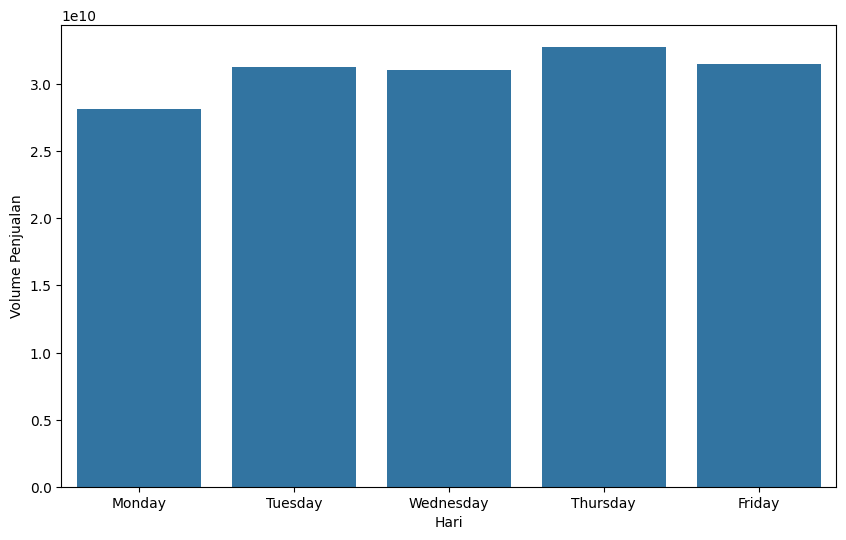

In [30]:
bmri['Date'] = pd.to_datetime(bmri['Date'])
bmri['DayName'] = bmri['Date'].dt.day_name()

volume_per_day = bmri.groupby('DayName')['Volume'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
])

plt.figure(figsize=(10, 6))
sns.barplot(x=volume_per_day.index, y=volume_per_day.values)
plt.xlabel('Hari')
plt.ylabel('Volume Penjualan')



*   Volume perdagangan saham BMRI cenderung lebih rendah pada hari Senin dibandingkan hari-hari lainnya.
*   Volume meningkat pada hari Selasa dan tetap tinggi hingga hari Kamis, menandakan peningkatan aktivitas perdagangan sejak awal minggu.
* Hari Kamis menunjukkan volume perdagangan tertinggi, menandakan aktivitas pasar yang paling intens sebelum sedikit menurun di hari Jumat.

